In [101]:
# import library
import pandas as pd

# read data into pandas dataframe (df)
names = pd.read_csv("/Users/Nicole/Documents/Programs/Names/baby-names.csv")
# split names df into one for boy names and one for girl names
b_names = names[names.sex == 'boy']
g_names = names[names.sex == 'girl']
# show first five rows of df
names.head()

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy


In [102]:
# show last five rows of df
names.tail()

,year,name,percent,sex
257995,2008,Carleigh,0.000128,girl
257996,2008,Iyana,0.000128,girl
257997,2008,Kenley,0.000127,girl
257998,2008,Sloane,0.000127,girl
257999,2008,Elianna,0.000127,girl


In [103]:
# show where girl names start
names[:][128998:129003]

,year,name,percent,sex
128998,2008,Jensen,0.000089,boy
128999,2008,Yurem,0.000089,boy
129000,1880,Mary,0.072381,girl
129001,1880,Anna,0.026678,girl
129002,1880,Emma,0.020521,girl


In [104]:
# count how often each name appears in the df
pd.set_option('display.max_rows', 10)
names["name"].value_counts(ascending = False)

Jessie       258
Leslie       247
Jean         244
Guadalupe    244
Lee          240
            ... 
Dema           1
Bjorn          1
Kareen         1
Ermine         1
Tavaris        1
Name: name, Length: 6782, dtype: int64

In [105]:
# count how many unique names are in the df
names["name"].nunique()

6782

In [106]:
# count how many unique years are in the df
names["year"].nunique()

129

In [107]:
# return names that appear less than once in the df
names['name'].value_counts()[names['name'].value_counts()<2]

Argie      1
Milly      1
Ceylon     1
Polk       1
Medora     1
          ..
Dema       1
Bjorn      1
Kareen     1
Ermine     1
Tavaris    1
Name: name, Length: 782, dtype: int64

In [108]:
# print rows for names that appeared only once in the df
print(names.groupby("name").filter(lambda x: len(x) == 1))

# count how many of these names each year had
u = names.groupby("name").filter(lambda x: len(x) == 1)
u['year'].value_counts()

        year      name   percent   sex
740     1880    Tilden  0.000068   boy
828     1880   Candido  0.000051   boy
831     1880  Clemente  0.000051   boy
854     1880    Friend  0.000051   boy
863     1880     Hence  0.000051   boy
...      ...       ...       ...   ...
257992  2008    Laylah  0.000129  girl
257995  2008  Carleigh  0.000128  girl
257997  2008    Kenley  0.000127  girl
257998  2008    Sloane  0.000127  girl
257999  2008   Elianna  0.000127  girl

[782 rows x 4 columns]


2008    49
1880    43
1881    37
1882    36
1883    28
        ..
1953     1
1950     1
1912     1
1942     1
1941     1
Name: year, Length: 118, dtype: int64

In [109]:
# What boy names are popular for all years?

# get rows where boy name appears 129 times, since 129 years are represented in the df
b_names129 = b_names.groupby("name").filter(lambda x: len(x) == 129)
# print number of boy names popular for all years and the names alphabetically
print(b_names129['name'].nunique())
print("")
print(b_names129['name'].value_counts().sort_index())

214

Aaron      129
Abraham    129
Adam       129
Adrian     129
Albert     129
          ... 
Wesley     129
Will       129
William    129
Willie     129
Wilson     129
Name: name, Length: 214, dtype: int64


In [110]:
# What girl names are popular for all years?

# get rows where girl name appears 129 times
g_names129 = g_names.groupby("name").filter(lambda x: len(x) == 129)
# print number of girl names popular for all years and the names alphabetically
print(g_names129['name'].nunique())
print("")
print(g_names129['name'].value_counts().sort_index())

115

Alice       129
Alma        129
Amanda      129
Amelia      129
Amy         129
           ... 
Theresa     129
Veronica    129
Victoria    129
Virginia    129
Vivian      129
Name: name, Length: 115, dtype: int64


In [111]:
# What names are popular for both boys and girls?

# list unique boy names
b_list = []
for n in range (0,129000):
    if b_names['name'][n] not in b_list:
        b_list.append(b_names['name'][n])

# list unique girl names
g_list = []
for n in range (129000,258000):
    if g_names['name'][n] not in g_list:
        g_list.append(g_names['name'][n])
        
# list names found in both boy and girl name lists
u_list = []
for b in b_list:
    if b in g_list:
        u_list.append(b)
print(len(u_list))
print(u_list[0:5], u_list[668:])# print only the first and last five results
        

673
['John', 'William', 'James', 'Charles', 'George'] ['Santana', 'Lyric', 'Kamryn', 'Marley', 'Eden']


In [112]:
# What names are popular for all years for both boys and girls? 
# Value counts will also show which names appear 258 times

# get boy names appearing 129 times and girl names appearing 129 times
b_names129 = b_names.groupby("name").filter(lambda x: len(x) == 129)
g_names129 = g_names.groupby("name").filter(lambda x: len(x) == 129)

# find intersection of two lists - boy names for all years and girl names for all years
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return len(set(lst3)), set(lst3)

print(intersection(b_names129['name'].tolist(),g_names129['name'].tolist()))

(1, {'Jessie'})


In [113]:
# For each year, what percent of boys born had a name in the top 1000?

for y in range (1880,1885):
    y_df = b_names[b_names.year == y]
    y_sum = y_df['percent'].sum()
    print(y, y_sum)

print("")

for y in range (2000,2005):
    y_df = b_names[b_names.year == y]
    y_sum = y_df['percent'].sum()
    print(y, y_sum)

1880 0.9307460000000009
1881 0.9304390000000067
1882 0.9275319999999948
1883 0.9287770000000067
1884 0.9272889999999933

2000 0.8342690000000004
2001 0.8292740000000016
2002 0.8265630000000008
2003 0.8242710000000014
2004 0.8172050000000013


In [114]:
# For each year, what percent of girls born had a name in the top 1000?

for y in range (1880,1885):
    y_df = g_names[g_names.year == y]
    y_sum = y_df['percent'].sum()
    print(y, y_sum)
    
print("")

for y in range (2000,2005):
    y_df = g_names[g_names.year == y]
    y_sum = y_df['percent'].sum()
    print(y, y_sum)

1880 0.934545999999999
1881 0.9326900000000024
1882 0.9309850000000048
1883 0.9333140000000062
1884 0.931352000000003

2000 0.7201520000000009
2001 0.7127020000000006
2002 0.7099589999999987
2003 0.7055450000000009
2004 0.6981670000000001


In [115]:
# For each year, how many names made up the top 50% for boys?

for y in range (1880,1885):
    y_df = b_names[b_names.year == y]
    x = 0
    y_sum = 0
    while x < len(y_df) and y_sum < 0.50:
        if y_df['percent'][0:x].sum() < 0.50:
            x = x+1
        else:
            y_sum = y_df['percent'][0:x].sum()
            print(y, x, y_sum)

1880 16 0.5049490000000001
1881 16 0.5009459999999999
1882 18 0.5061
1883 18 0.5070020000000001
1884 20 0.5061720000000002


In [116]:
# For each year, how many names made up the top 50% for girls?

for y in range (1880,1885):
    y_df = g_names[g_names.year == y]
    x = 0
    y_sum = 0
    while x < len(y_df) and y_sum < 0.50:
        if y_df['percent'][0:x].sum() < 0.50:
            x = x+1
        else:
            y_sum = y_df['percent'][0:x].sum()
            print(y, x, y_sum)

1880 43 0.503815
1881 43 0.5021319999999999
1882 43 0.501642
1883 44 0.5049130000000002
1884 44 0.502521


In [117]:
# What percent of boy names in each year were also popular in the previous year?

for y in range (1881,1886):
    y_next = b_names[b_names.year == y]
    y_last = b_names[b_names.year == y-1]
    overlap = [value for value in y_next['name'].tolist() if value in y_last['name'].tolist()]
    print(y, len(overlap)/1000)

1881 0.819
1882 0.814
1883 0.827
1884 0.83
1885 0.819


In [118]:
# What percent of girl names in each year were also popular in the previous year?

for y in range (1881,1886):
    y_next = g_names[g_names.year == y]
    y_last = g_names[g_names.year == y-1]
    overlap = [value for value in y_next['name'].tolist() if value in y_last['name'].tolist()]
    print(y, len(overlap)/1000)

1881 0.83
1882 0.828
1883 0.839
1884 0.834
1885 0.843


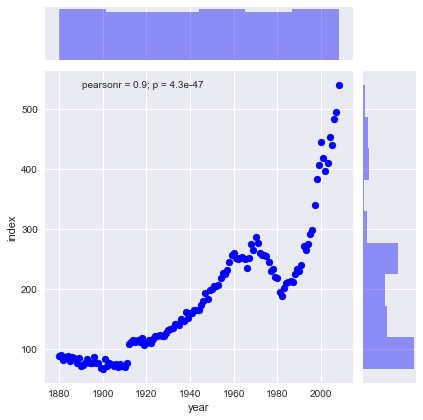

In [119]:
# Plot popularity of the name Jessie by year for boys

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

b_Jessie = b_names[b_names.name == 'Jessie']
b_Jessie.reset_index(inplace=True)
b_Jessie['index'] = b_Jessie['index'] % 1000

import seaborn as sns
import matplotlib.pyplot as plt
plot = sns.jointplot(data = b_Jessie, x='year', y='index', color='b')
plt.show()

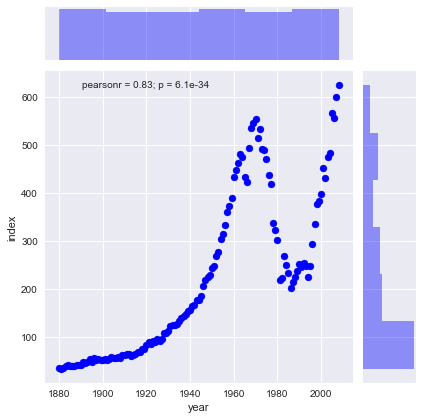

In [120]:
# Plot popularity of the name Jessie by year for girls

pd.options.mode.chained_assignment = None  # default='warn'

g_Jessie = g_names[g_names.name == 'Jessie']
g_Jessie.reset_index(inplace=True)
g_Jessie['index'] = g_Jessie['index'] % 1000

import seaborn as sns
import matplotlib.pyplot as plt
plot = sns.jointplot(data = g_Jessie, x='year', y='index', color='b')
plt.show()

In [121]:
# Which girl name changed the most in popularity between two years

pd.options.mode.chained_assignment = None  # default='warn'

g_names.reset_index(inplace=True)
g_names['index'] = (g_names['index'] % 1000) + 1
g_ranks = pd.DataFrame(index=range(8036), columns=range(3))

list_gnames = g_names.name.unique()
i = 0
for y in range (1880,1882):
    g_year = g_names[g_names.year == y]
    for n in list_gnames:
        g_year_n = g_year[g_year.name == n]
        if len(g_year_n.index) > 0:
            g_ranks[0][i] = y
            g_ranks[1][i] = n
            rank = g_year_n['index'].tolist()
            g_ranks[2][i] = rank[0]
            i = i+1
        else:
            g_ranks[0][i] = y
            g_ranks[1][i] = n
            g_ranks[2][i] = 1001
            i = i+1
g_ranks_y1 = g_ranks[g_ranks[0] == 1880]
g_ranks_y2 = g_ranks[g_ranks[0] == 1881]

# return names where rank fell or rose at least 500 places 
y1_y2 = []
for n in list_gnames:
    g_y1 = g_ranks_y1[g_ranks_y1[1] == n]
    g_y2 = g_ranks_y2[g_ranks_y2[1] == n]
    r_change =  g_y1[2].tolist()[0] - g_y2[2].tolist()[0]
    if abs(r_change) < 500:
        r_change = "insufficient"
    else:
        n_y1_y2 = []
        n_y1_y2.append(n)
        n_y1_y2.append(r_change)
        y1_y2.append(n_y1_y2)
print(y1_y2)

[['Peggy', -514], ['Celeste', 515]]
